In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\User\Desktop\titanic_train.csv")
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### This dataset contains the data of passenger in which both numerical and catogerical data are present.Here "survived" is the target variable which contains 2 catogeries so it is termed as calssification problem.Here we need to predict wheather the passenger is survived or not based on data.

In [3]:
df.shape

(891, 13)

#### In this data set total 891 rowsand 13 columns in which one is target column and remaining 12 columns are features

In [4]:
df.columns.tolist()

['Unnamed: 0',
 'PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### We can see that the data type of survived,Pclass,age is not correct so we can change the data type of this column.

In [6]:
df.isnull().mean()*100

Unnamed: 0      0.000000
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Here we can see that cabin column has 77% missing value so we cannot fill that value so we can delete this column.

#### Here we can see that in age and embarked column there is some missing values lets handel it later

In [7]:
df = df.drop(columns=['Cabin'])
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [9]:
df['PassengerId'].nunique()

891

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0      1
598    1
587    1
588    1
589    1
      ..
300    1
301    1
302    1
303    1
890    1
Name: Unnamed: 0, Length: 891, dtype: int64


1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.0

In [11]:
#checking the number of unique value in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
Unnamed: 0,891
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681


#### Here we can see that passengerid is unique for all of the passenger so there is no need of unnamed:0 column so we can delete this column.

In [12]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:


df['Age']=df['Age'].astype('int')



IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

### Lets see the statistical summary of numerical columns.

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### from the above description we can observe the folloeing:-
#### The count of all value is not  same which means there is  missing values in the dataset .

#### The median(50%)value is grater than the mean in Pclass columns which means the data is skewed to left in the column

#### The median(50%)value is less than the mean in age,sibsp,parch,fare whichbmeans the data is skewed to right in the column.

#### By summarizing the data we can observe that there is a huge difference between 75% and max hence there are outliers present in the data.
#### we can also notice the standar devition ,minimum value ,25% percentile values from this describe.

In [16]:
### inputing the missing value in Age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [17]:
### inputing the missing value in Embarked column
df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df['Embarked'].fillna('S',inplace=True)

In [19]:
#### again show describe method after filling the missing value if there is some changes or not
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Lets do univariate analysis on each of the column

out of 891 62% people died in the accident


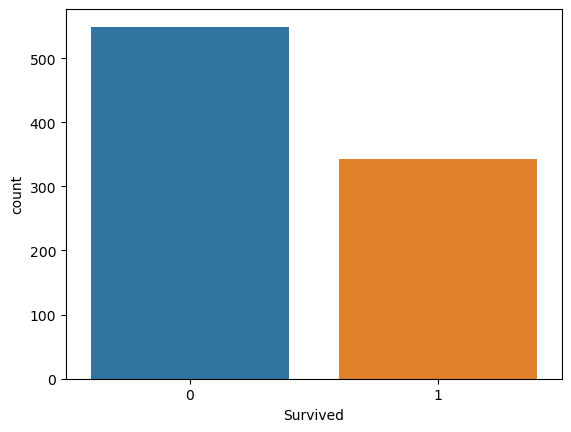

In [20]:
sns.countplot(df['Survived'])
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)
print("out of 891 {}% people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


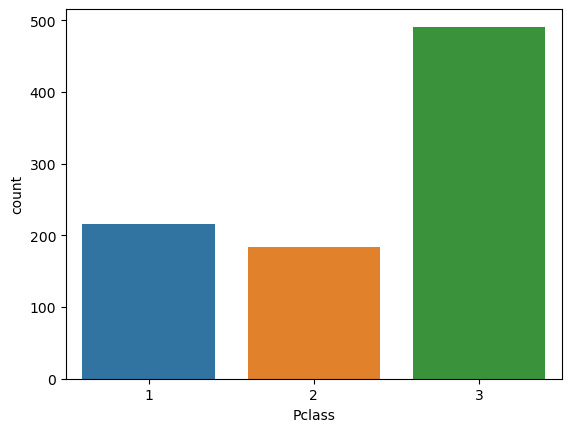

In [21]:
sns.countplot(df['Pclass'])
print((df['Pclass'].value_counts()/891)*100)

#### we can see that 55% people goes in pclass3,24% people goes in pclass1 and 20% people goes in pclass2

male      64.758698
female    35.241302
Name: Sex, dtype: float64


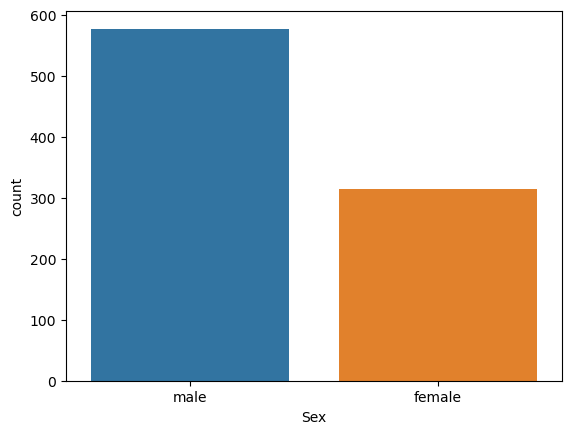

In [22]:
sns.countplot(df['Sex'])
print((df['Sex'].value_counts()/891)*100)

#### we can see from the plot that male passenger is  almost 65% and female passenger is 35% ,so male is more as compared to female

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


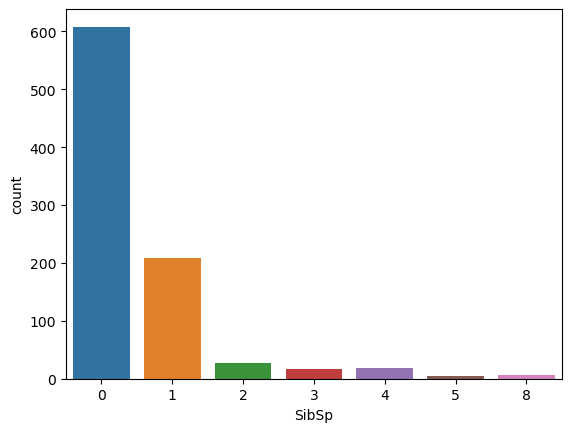

In [23]:
sns.countplot(df['SibSp'])
print(df['SibSp'].value_counts())

### we can see that 608 people goes alone and remaining passenger are goes with family members.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


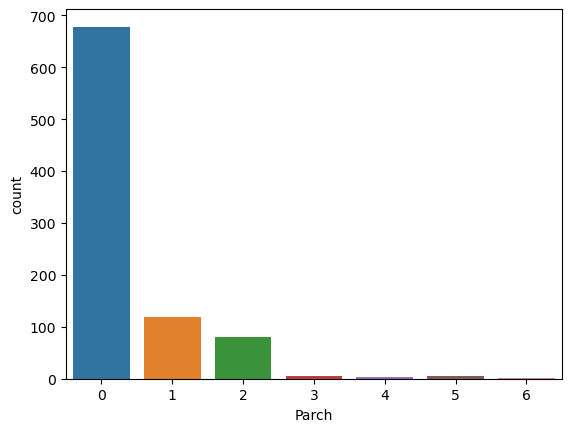

In [24]:
sns.countplot(df['Parch'])
print(df['Parch'].value_counts())

#### we can see that 678 people are going without parch and remaining p[assenger are going with parch

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


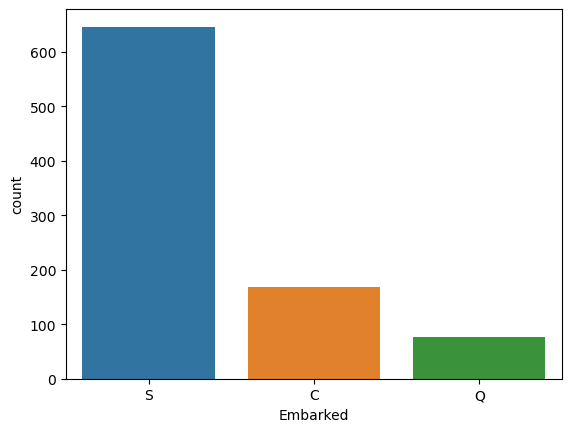

In [25]:
sns.countplot(df['Embarked'])
print((df['Embarked'].value_counts()/891)*100)

#### we can see that 72% people are going to "S" and 18% people are going to "C" and 8% people are going to "Q " city.

<AxesSubplot:xlabel='Age', ylabel='Density'>

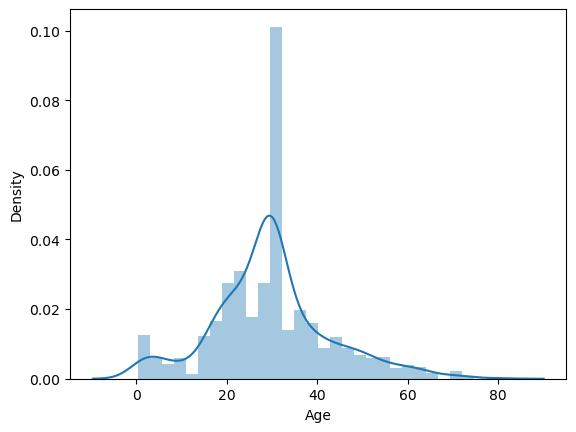

In [26]:
sns.distplot(df['Age'])

### we can see that most of the people are in the range of 20-40 sao most of the young people are travelling

<AxesSubplot:xlabel='Age'>

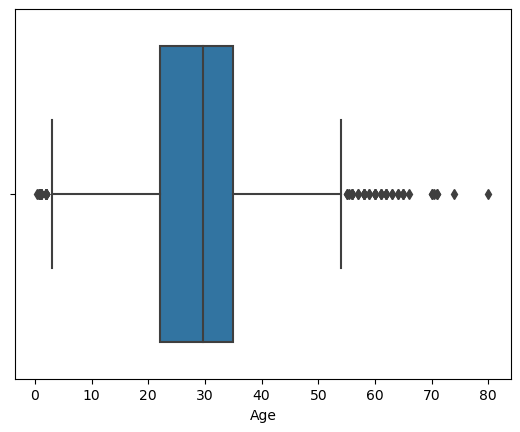

In [27]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

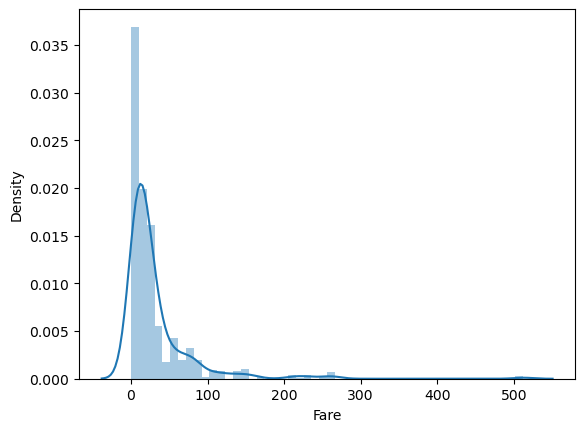

In [28]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Fare'>

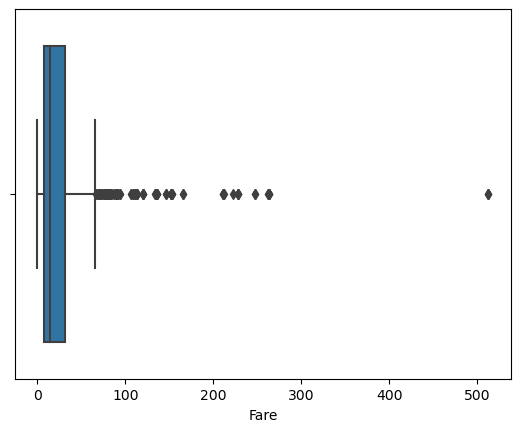

In [29]:
sns.boxplot(df['Fare'])

### Bivariate Analysis

In [30]:
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


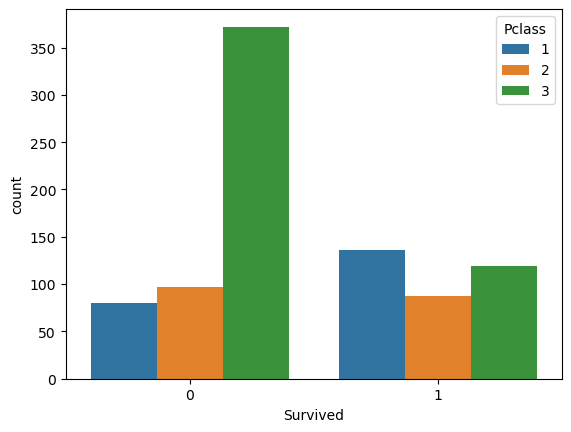

In [31]:
# survuival with Pclass
sns.countplot(df['Survived'],hue=df['Pclass'])
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r:((r/r.sum())*100),axis=1)

#### We  can see from the graph that in Pclass3 is very dangerious in which almost 76% people died and in Pclass 2 almost 53% people died and in Pclass 1 is the saftey class in which 37% people died.

Survived,0,1
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,0.000000
8,100.000000,0.000000


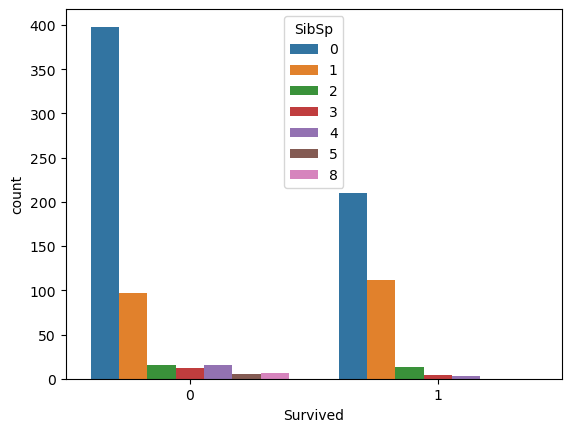

In [32]:
# survuival with Pclass
sns.countplot(df['Survived'],hue=df['SibSp'])
pd.crosstab(df['SibSp'],df['Survived']).apply(lambda r:((r/r.sum())*100),axis=1)

#### 65% people who travell alone was died and the pasenger who travell with 1 or 2 family members they are safe and the passenger who travell with more than 3 family members the died percentage of them are almost 80%.

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


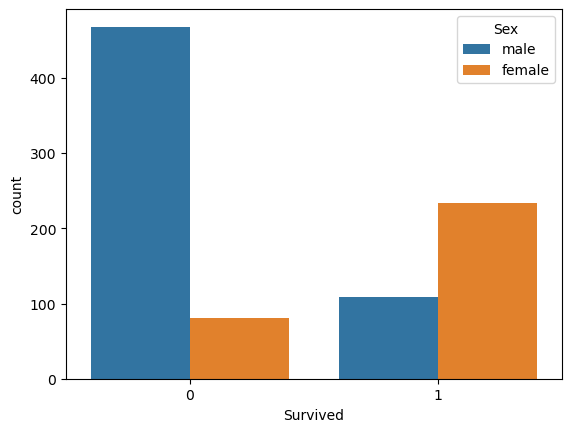

In [33]:
# survuival with Pclass
sns.countplot(df['Survived'],hue=df['Sex'])
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r:((r/r.sum())*100),axis=1)

#### We can see that the died percentage of male is 81% and the died percentage of female are almost 26% so male are died more as compared to the female.

Survived,0,1
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,0.000000
5,80.000000,20.000000
6,100.000000,0.000000


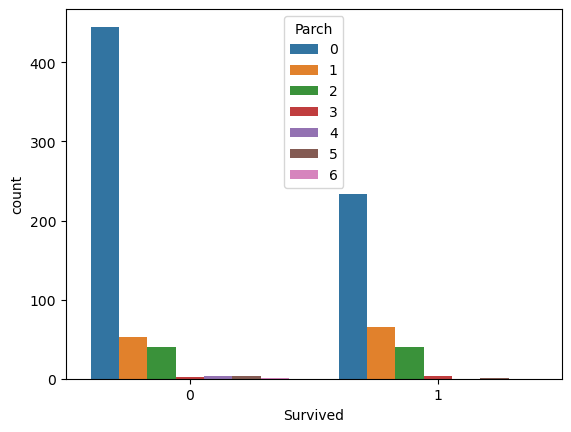

In [34]:
# survuival with Pclass
sns.countplot(df['Survived'],hue=df['Parch'])
pd.crosstab(df['Parch'],df['Survived']).apply(lambda r:((r/r.sum())*100),axis=1)

### we can see same trend as SibSp in survied vs Parch

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.099071,33.900929


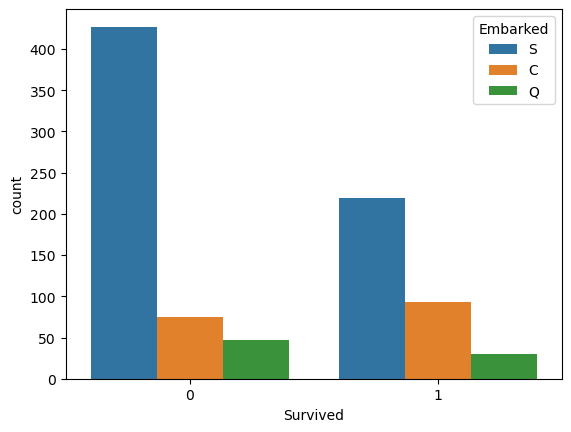

In [35]:
# survuival with Pclass
sns.countplot(df['Survived'],hue=df['Embarked'])
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r:((r/r.sum())*100),axis=1)

#### we can see that the passenger who goes to 'S' city 66% people are died of them and the people who goes to 'Q' city 61% percentage people died and the passenger who goes to 'C' city almost 45% people died of them.

<AxesSubplot:xlabel='Age', ylabel='Density'>

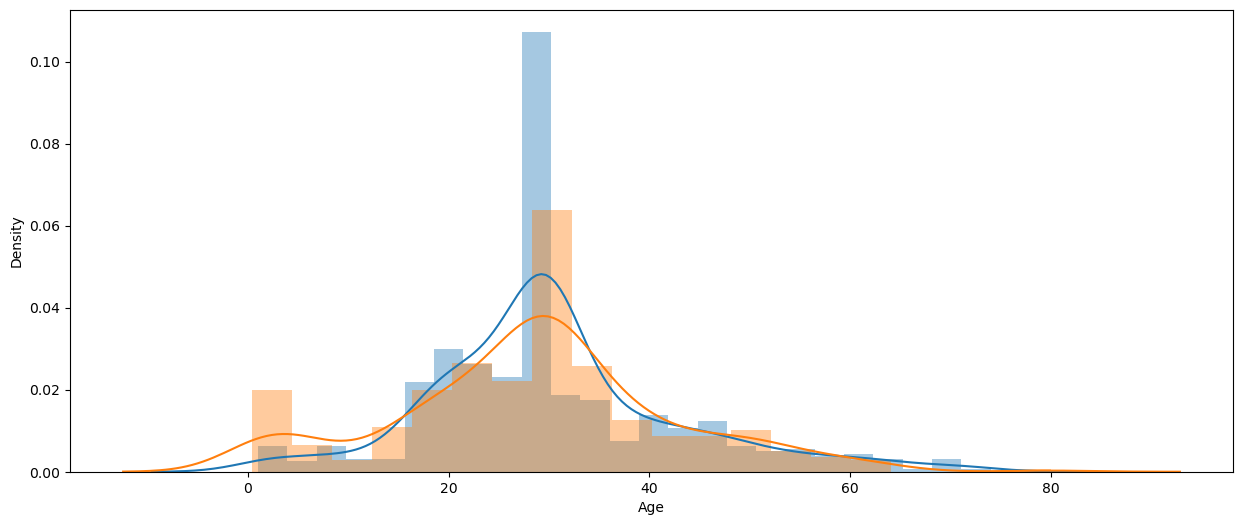

In [36]:
#survived with age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

### we can see from the grph that in case of lower age group between 0 to almost 15 the percentage of surivied is more as compared to the percentage of not survived.

### but in the age group betwen almost 17 to almost 35 the percentage of survived is les as compared to percentage of not survived.

### in the age group between 45 to almost 56 the percentge of survived is more as compared to percentage of not survived.

### in the age between 60 to 80 the percentage of survired is less as compared of not survived.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

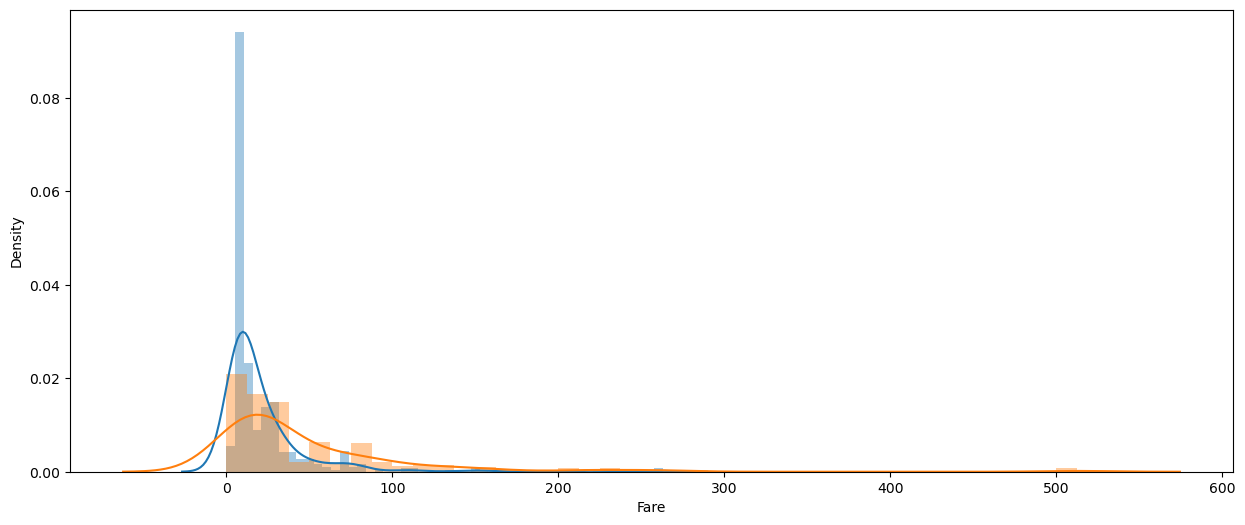

In [37]:
#survived with age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

### The passenger with the low fare the percentage of survived is less .

### But when the fare is incresse the percentage of survived is high.

### Multivarient Anlysis

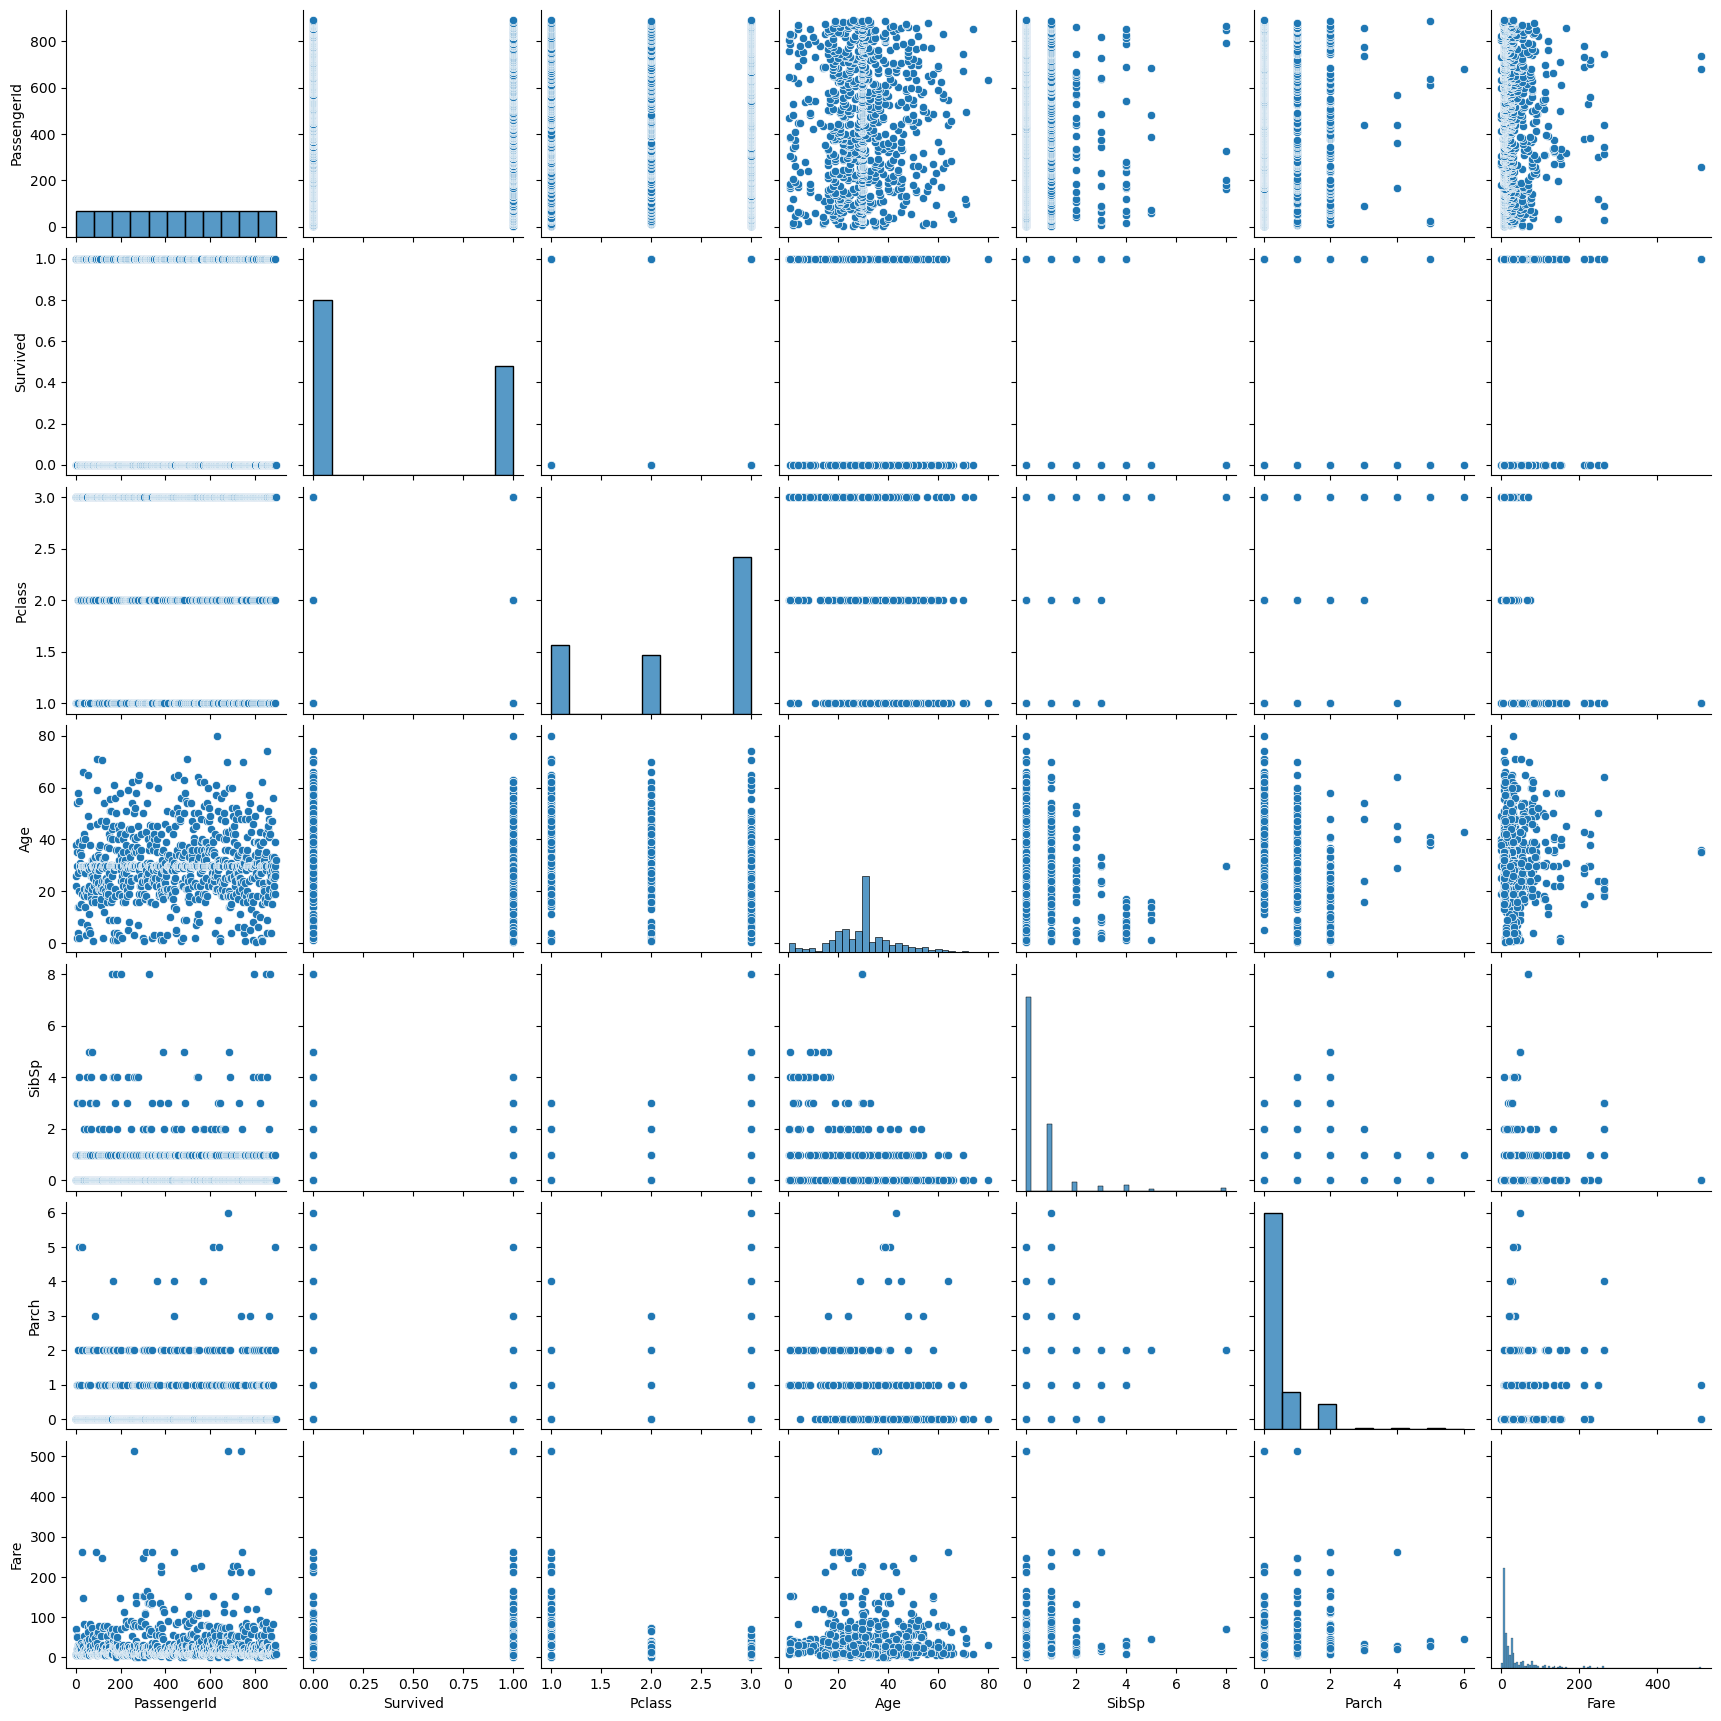

In [38]:
sns.pairplot(data=df,palette="Dark2")

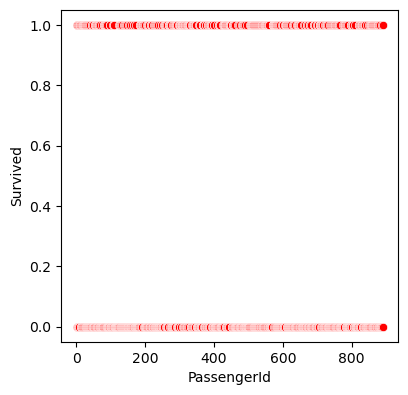

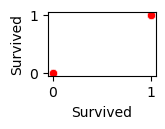

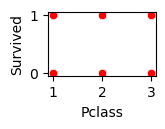

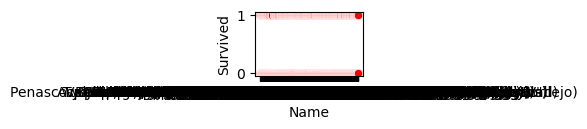

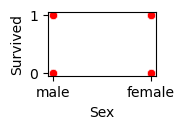

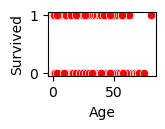

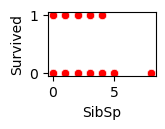

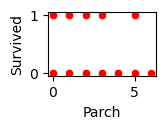

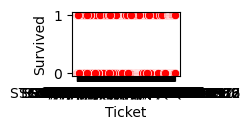

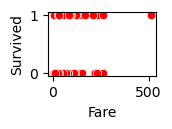

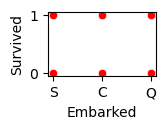

In [39]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=17:
        plt.subplot(5,4,plotnumber)
        sns.scatterplot(x=i,y='Survived',data=df,color='r')
        
    plotnumber+=1
    plt.show()
    

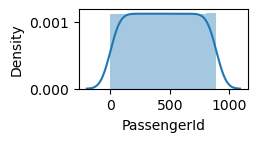

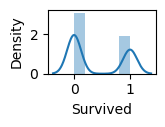

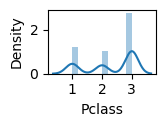

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

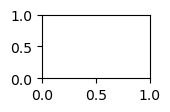

In [40]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()

### Encoding the catogerical column

In [ ]:
df['Sex'].value_counts()

In [ ]:
df['Embarked'].value_counts()

In [43]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
df.head()

#### we can see that passenger id is unique for all the passenger so we dont require the passengerid

#### Name is also be unique for all the passenger so we dont need name column.

#### simillarly Ticket is unique for all of the passenger so we dont use Ticket column

In [44]:
df=df.drop(columns=['PassengerId','Name','Ticket',],axis=1)
df.head()

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

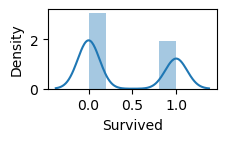

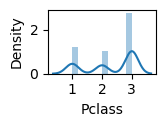

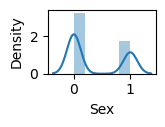

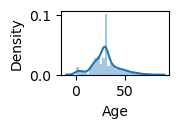

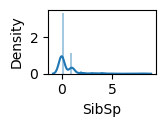

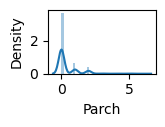

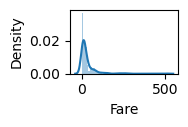

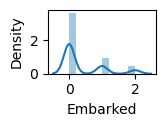

In [45]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()

In [46]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

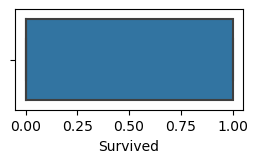

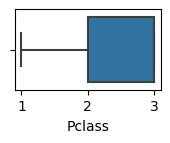

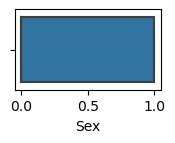

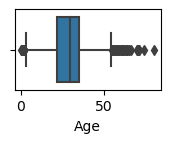

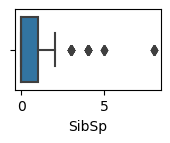

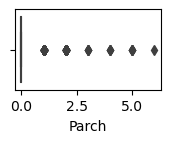

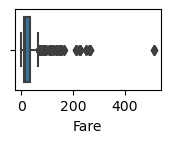

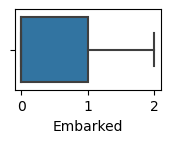

In [48]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[col])
        
        plotnumber+=1
        plt.show()

### we can see outliers in Age,SibSp,parch and Fare column so we can remove the outliers

In [49]:
from scipy.stats import zscore
out_features=df[['Age','SibSp','Parch','Fare']]
z=np.abs(zscore(out_features))
z

,Age,SibSp,Parch,Fare
0,0.592481,0.432793,0.473674,0.502445
1,0.638789,0.432793,0.473674,0.786845
2,0.284663,0.474545,0.473674,0.488854
3,0.407926,0.432793,0.473674,0.420730
4,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...
886,0.207709,0.474545,0.473674,0.386671
887,0.823344,0.474545,0.473674,0.044381
888,0.000000,0.432793,2.008933,0.176263
889,0.284663,0.474545,0.473674,0.044381


In [50]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 0, 3, 1, 1, 3, 2,
        2, 0, 2, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 1, 1, 1,
        1, 1, 0, 2, 1, 2], dtype=int64))

In [51]:
df1=df[(z<3).all(axis=1)]
df1.shape

(820, 8)

In [52]:
#shape of old and new DataFrame
print("old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

old Data Frame- 891
New Data Frame- 820


In [53]:
print("data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage- 7.968574635241302


In [54]:
df=df1

### Lets check how the data is distributed in each columns

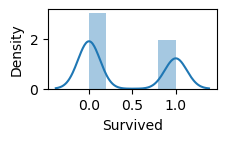

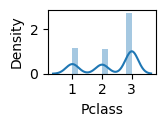

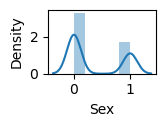

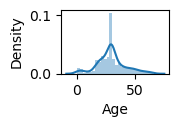

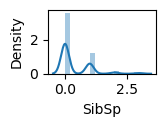

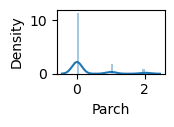

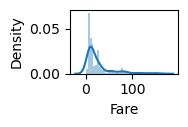

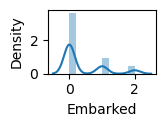

In [56]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()

In [57]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex         0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked    1.552592
dtype: float64

### we can see that in Pclass the data is skewed to left.
#### in sex,sibsp,prch,fare,embarked the data is skewed to right

#### lets handel this skewness

0.6641523854031525


<AxesSubplot:xlabel='Sex', ylabel='Density'>

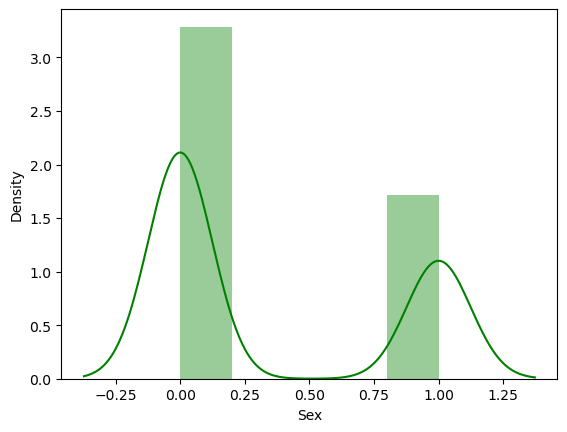

In [59]:
#removing skewness using cuberoot method
df['Sex']=np.cbrt(df['Sex'])
print(df['Sex'].skew())
sns.distplot(df['Sex'],color='g')

1.136758428705327


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

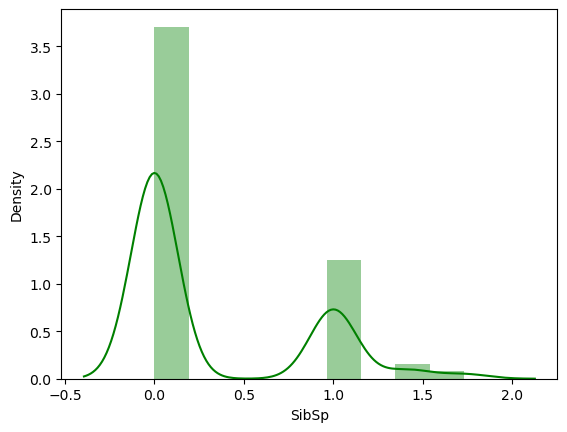

In [60]:
df['SibSp']=np.sqrt(df['SibSp'])
print(df['SibSp'].skew())
sns.distplot(df['SibSp'],color='g')

1.6432589237544803


<AxesSubplot:xlabel='Parch', ylabel='Density'>

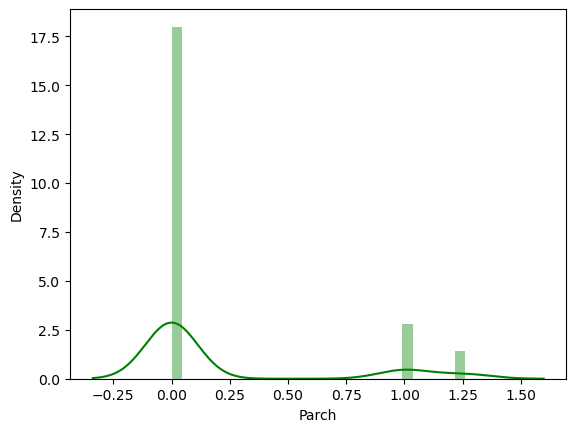

In [61]:
df['Parch']=np.cbrt(df['Parch'])
print(df['Parch'].skew())
sns.distplot(df['Parch'],color='g')

1.350428111936211


<AxesSubplot:xlabel='Fare', ylabel='Density'>

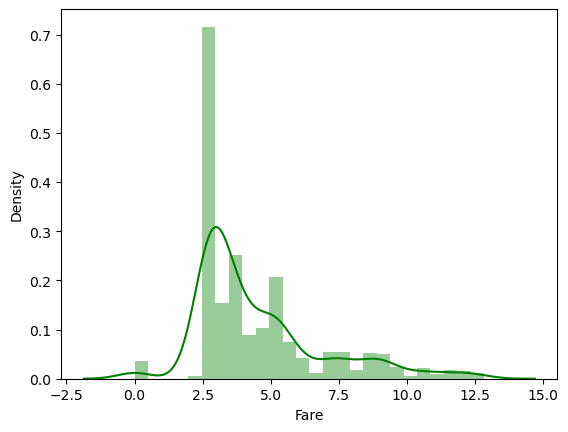

In [62]:
df['Fare']=np.sqrt(df['Fare'])
print(df['Fare'].skew())
sns.distplot(df['Fare'],color='g')

1.0796464920325455


<AxesSubplot:xlabel='Embarked', ylabel='Density'>

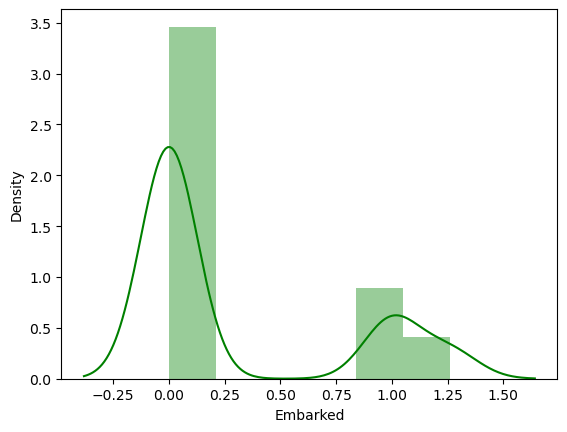

In [63]:
df['Embarked']=np.cbrt(df['Embarked'])
print(df['Embarked'].skew())
sns.distplot(df['Embarked'],color='g')

In [66]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,2.310976,0.342683,29.792831,0.310820,0.207044,4.497271,0.283774
std,0.826678,0.474896,12.151418,0.502474,0.430778,2.370117,0.464124
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,2.809947,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,3.605551,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,5.196152,1.000000
max,3.000000,1.000000,66.000000,1.732051,1.259921,12.840043,1.122462


In [64]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.322306,0.554888,-0.090926,0.135134,0.210930,0.361768,0.134560
Pclass,-0.322306,1.000000,-0.138041,-0.327522,-0.101422,-0.078780,-0.729156,-0.002314
Sex,0.554888,-0.138041,1.000000,-0.094544,0.211789,0.256155,0.263915,0.137410
Age,-0.090926,-0.327522,-0.094544,1.000000,-0.122268,-0.253006,0.156793,0.006483
SibSp,0.135134,-0.101422,0.211789,-0.122268,1.000000,0.346834,0.354907,0.007498
Parch,0.210930,-0.078780,0.256155,-0.253006,0.346834,1.000000,0.290974,-0.030470
Fare,0.361768,-0.729156,0.263915,0.156793,0.354907,0.290974,1.000000,0.089137
Embarked,0.134560,-0.002314,0.137410,0.006483,0.007498,-0.030470,0.089137,1.000000


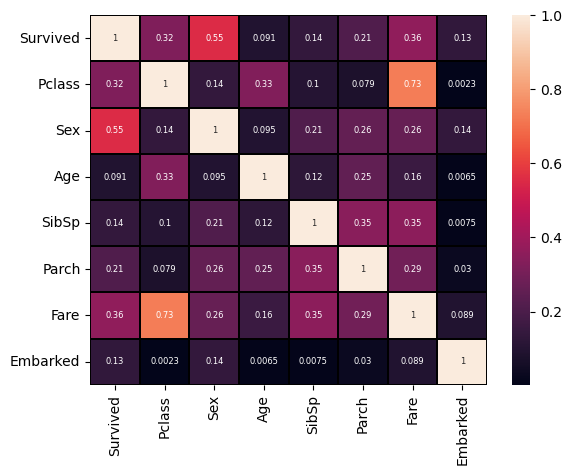

In [65]:
df_corr = df.corr().abs() #This code will get the coefficient of one variable vs other variable(relationship)
plt.figure
sns.heatmap(df_corr,annot= True,annot_kws={'size':6},linecolor='black',linewidth=0.2)
plt.show()

### This heatmap show the corelation matrix by visualizing the data .we can observe the relation between feature to feature and feature to lable in the heat map.

### This heatmap contains only positive corelation.

### we donot see any strong corelation between features and features and between features and lable.

### so there is no multicolinearity issue present in this data set





### seperating features and lable

In [69]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

### Features scaling using StandardScaler

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.833995,-0.722036,-0.641702,1.372413,-0.480921,-0.761899,-0.607859
1,-1.586804,1.384973,0.675821,1.372413,-0.480921,1.665775,1.447968
2,0.833995,1.384973,-0.312321,-0.618956,-0.480921,-0.710159,-0.607859
3,-1.586804,1.384973,0.428785,1.372413,-0.480921,1.177750,-0.607859
4,0.833995,-0.722036,0.428785,-0.618956,-0.480921,-0.700823,-0.607859
...,...,...,...,...,...,...,...
815,-0.376405,-0.722036,-0.229976,-0.618956,-0.480921,-0.376464,-0.607859
816,-1.586804,1.384973,-0.888737,-0.618956,-0.480921,0.413715,-0.607859
817,0.833995,1.384973,-0.007717,1.372413,2.445624,0.145756,-0.607859
818,-1.586804,-0.722036,-0.312321,-0.618956,-0.480921,0.413715,1.447968


### we crosscheck using VarianceInflationFactor if there is any multicolinearity present

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,2.511075,Pclass
1,1.151918,Sex
2,1.240913,Age
3,1.302828,SibSp
4,1.321637,Parch
5,2.825795,Fare
6,1.042422,Embarked


#### we can see that all the VIF value is less than 10 so there is nomulticolinearity issue

### Modeling

### Finding the best random state

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy",maxAccu,"at Random state",maxRS)        
        

Best Accuracy 0.8455284552845529 at Random state 14


In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    820 non-null    float64
 1   Sex       820 non-null    float64
 2   Age       820 non-null    float64
 3   SibSp     820 non-null    float64
 4   Parch     820 non-null    float64
 5   Fare      820 non-null    float64
 6   Embarked  820 non-null    float64
dtypes: float64(7)
memory usage: 45.0 KB


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [76]:
#write one function and call as many times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        
        print("\n==================Train Result====================")
        
        print(f"Accuracy score:{accuracy_score(y_train,y_pred) * 100: 2f}%")
        
        
        
    elif train==False:
        pred= clf.predict(x_test)
        
        
        print("\n=====================Test Result===================")
        
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:2f}%")
        
        
        print('\n \n Test Classifier Report \n',classification_report(y_test,pred,digits=2))
        
        print('\n \n confusion matrix \n',confusion_matrix(y_test,pred))

### RandomForestClassifier

In [77]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
metric_score(RFC,x_train,x_test,y_train,y_test,train=True)
metric_score(RFC,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 97.909408%

=====================Test Result===================
Accuracy score:84.959350%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       142
           1       0.84      0.80      0.82       104

    accuracy                           0.85       246
   macro avg       0.85      0.84      0.84       246
weighted avg       0.85      0.85      0.85       246


 
 confusion matrix 
 [[126  16]
 [ 21  83]]


### Logistic Regression

In [79]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [80]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 77.526132%

=====================Test Result===================
Accuracy score:82.520325%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       142
           1       0.81      0.76      0.79       104

    accuracy                           0.83       246
   macro avg       0.82      0.82      0.82       246
weighted avg       0.82      0.83      0.82       246


 
 confusion matrix 
 [[124  18]
 [ 25  79]]


In [82]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [83]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 82.752613%

=====================Test Result===================
Accuracy score:85.365854%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       142
           1       0.90      0.73      0.81       104

    accuracy                           0.85       246
   macro avg       0.87      0.84      0.85       246
weighted avg       0.86      0.85      0.85       246


 
 confusion matrix 
 [[134   8]
 [ 28  76]]


### DecisionTreeClassifier

In [85]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
metric_score(DT,x_train,x_test,y_train,y_test,train=True)
metric_score(DT,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 97.909408%

=====================Test Result===================
Accuracy score:77.235772%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       142
           1       0.71      0.77      0.74       104

    accuracy                           0.77       246
   macro avg       0.77      0.77      0.77       246
weighted avg       0.78      0.77      0.77       246


 
 confusion matrix 
 [[110  32]
 [ 24  80]]


### GradientBoostingClassifier

In [89]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [90]:
metric_score(GBC,x_train,x_test,y_train,y_test,train=True)
metric_score(GBC,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 90.418118%

=====================Test Result===================
Accuracy score:84.959350%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.88       142
           1       0.88      0.75      0.81       104

    accuracy                           0.85       246
   macro avg       0.86      0.84      0.84       246
weighted avg       0.85      0.85      0.85       246


 
 confusion matrix 
 [[131  11]
 [ 26  78]]


### AdaBoostClassifier

In [91]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)

AdaBoostClassifier()

In [92]:
metric_score(ABC,x_train,x_test,y_train,y_test,train=True)
metric_score(ABC,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 82.404181%

=====================Test Result===================
Accuracy score:80.894309%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       142
           1       0.79      0.75      0.77       104

    accuracy                           0.81       246
   macro avg       0.81      0.80      0.80       246
weighted avg       0.81      0.81      0.81       246


 
 confusion matrix 
 [[121  21]
 [ 26  78]]


### BaggingClassifier

In [93]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)

BaggingClassifier()

In [94]:
metric_score(BC,x_train,x_test,y_train,y_test,train=True)
metric_score(BC,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 95.818815%

=====================Test Result===================
Accuracy score:82.926829%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       142
           1       0.82      0.77      0.79       104

    accuracy                           0.83       246
   macro avg       0.83      0.82      0.82       246
weighted avg       0.83      0.83      0.83       246


 
 confusion matrix 
 [[124  18]
 [ 24  80]]


In [95]:
#checking cv score for RandomForestClassifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.76219512 0.80487805 0.84756098 0.76219512 0.83536585]
0.8024390243902438
Differcnce between accuracy score and cross validation score is - -0.23333333333333328


In [96]:
#checking cv score for LogisticRegression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.79268293 0.7804878  0.76829268 0.79878049 0.80487805]
0.7890243902439025
Differcnce between accuracy score and cross validation score is - -0.21991869918699192


In [97]:
#checking cv score for svc
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.82926829 0.79268293 0.81097561 0.79878049 0.8597561 ]
0.8182926829268293
Differcnce between accuracy score and cross validation score is - -0.24918699186991877


In [98]:
#checking cv score for RandomForestClassifier
score=cross_val_score(DT,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.68292683 0.75609756 0.79878049 0.73780488 0.80487805]
0.7560975609756098
Differcnce between accuracy score and cross validation score is - -0.1869918699186992


In [99]:
#checking cv score for RandomForestClassifier
score=cross_val_score(GBC,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.7804878  0.81707317 0.83536585 0.79268293 0.81707317]
0.8085365853658537
Differcnce between accuracy score and cross validation score is - -0.23943089430894315


In [100]:
#checking cv score for RandomForestClassifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.76219512 0.79268293 0.79268293 0.79268293 0.83536585]
0.7951219512195122
Differcnce between accuracy score and cross validation score is - -0.22601626016260168


In [101]:
#checking cv score for RandomForestClassifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.78658537 0.79268293 0.84146341 0.74390244 0.81707317]
0.7963414634146342
Differcnce between accuracy score and cross validation score is - -0.22723577235772363


#### DecisionTreeClassifier is our best model as the difference between accuracy score and cross validation score is least.
#### DecisionTree Classifier is our Best model

### Hyper parameter Tuning to find the best paramet

In [102]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,20),     
    
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,15),
    'max_leaf_nodes':range(5,40)
    
}

In [103]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=DT,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [104]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(5, 40),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 15)})

In [105]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 9, 'min_samples_split': 3}


In [106]:
#Intitate DecisionTreeClassifier with new parameters and train
DT=DecisionTreeClassifier(criterion = 'gini',max_depth=10,max_leaf_nodes=7,min_samples_leaf=9,min_samples_split=3)
#Train the model
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=9,
                       min_samples_split=3)

In [107]:
metric_score(DT,x_train,x_test,y_train,y_test,train=True)
metric_score(DT,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 81.881533%

=====================Test Result===================
Accuracy score:83.739837%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       142
           1       0.81      0.81      0.81       104

    accuracy                           0.84       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.84      0.84      0.84       246


 
 confusion matrix 
 [[122  20]
 [ 20  84]]


In [109]:
import pickle
filename='titanic_train.pkl'
pickle.dump(DT,open(filename,'wb'))

In [110]:
import pickle
loaded_model=pickle.load(open('titanic_train.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

83.73983739837398


In [111]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
predicted,0,1,1,1,1,0,1,0,1,1,...,0,1,0,1,1,0,1,0,1,0
original,0,0,1,1,1,0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
